In [134]:
import numpy as np
import pandas as pd

In [137]:
df = pd.read_csv('SMS SPAM CLASSIFIER/spam.csv', encoding='latin-1')

In [138]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4993,ham,My drive can only be read. I need to write,NaN,NaN,NaN
1314,ham,Got but got 2 colours lor. One colour is quite...,NaN,NaN,NaN
4215,ham,Er mw im filled tuth is aight,NaN,NaN,NaN
4895,ham,2 and half years i missed your friendship:-),NaN,NaN,NaN
762,spam,Urgent Ur å£500 guaranteed award is still uncl...,NaN,NaN,NaN


In [139]:
df.shape

(5572, 5)

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [141]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [142]:
df.sample(5)

,v1,v2
5156,ham,"Sir, I need Velusamy sir's date of birth and c..."
2844,ham,Will be out of class in a few hours. Sorry
3196,ham,So its to be poking man everyday that they tea...
3257,ham,He fucking chickened out. He messaged me he wo...
263,spam,Hey I am really horny want to chat or see me n...


In [143]:
df.rename(columns={'v1':'target', 'v2':'text'},inplace=True)

In [144]:
df.sample(5)

,target,text
3770,ham,"Hi, wlcome back, did wonder if you got eaten b..."
2031,ham,"I noe la... U wana pei bf oso rite... K lor, o..."
2936,ham,Lol yep did that yesterday. Already got my fir...
2102,ham,Audrie lousy autocorrect
1274,ham,Let me know how to contact you. I've you settl...


In [145]:
from sklearn.preprocessing import LabelEncoder

In [146]:
encoder = LabelEncoder()

In [147]:
df['target'] = encoder.fit_transform(df['target'])

In [148]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [149]:
df.isnull().sum() #missing values

target    0
text      0
dtype: int64

In [150]:
#check for duplicate values

In [151]:
df.duplicated().sum()

403

In [152]:
df = df.drop_duplicates(keep='first') #remove duplicates

In [153]:
df.duplicated().sum()

0

In [154]:
df.shape

(5169, 2)

In [155]:
#EDA

In [156]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [157]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

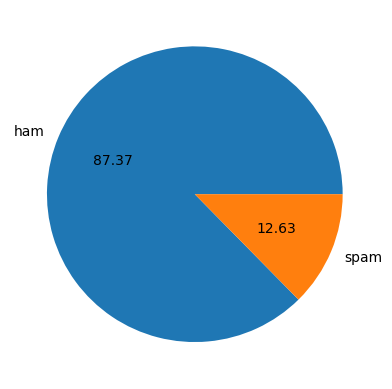

In [158]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [159]:
#data is imbalanced 

In [160]:
import nltk

In [161]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\visma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [162]:
df['num_characters'] = df['text'].apply(len)

In [163]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [164]:
#num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [165]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [166]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [167]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [168]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [169]:
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()   #ham

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [170]:
#spam
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()  

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [171]:
import seaborn as sns

C:\Users\visma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\visma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_characters', ylabel='Count'>

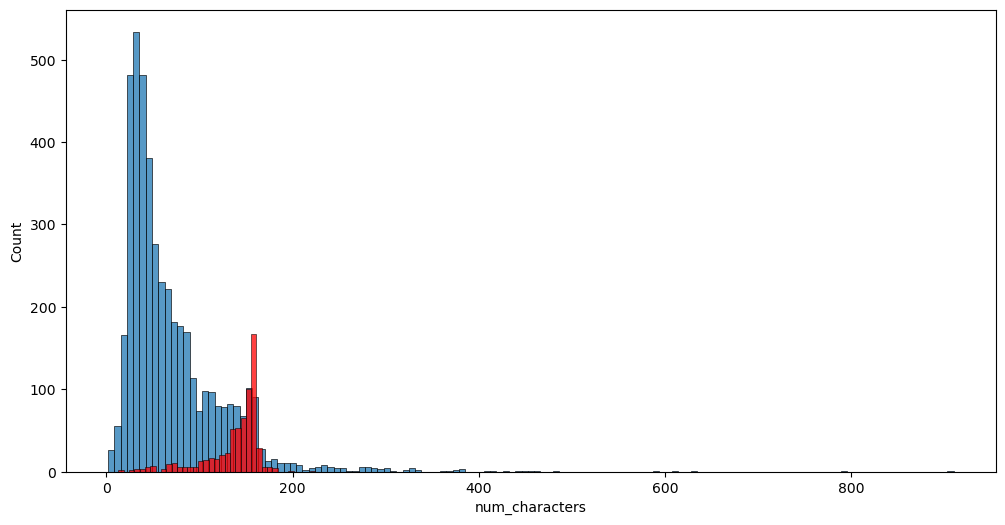

In [172]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

C:\Users\visma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\visma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_words', ylabel='Count'>

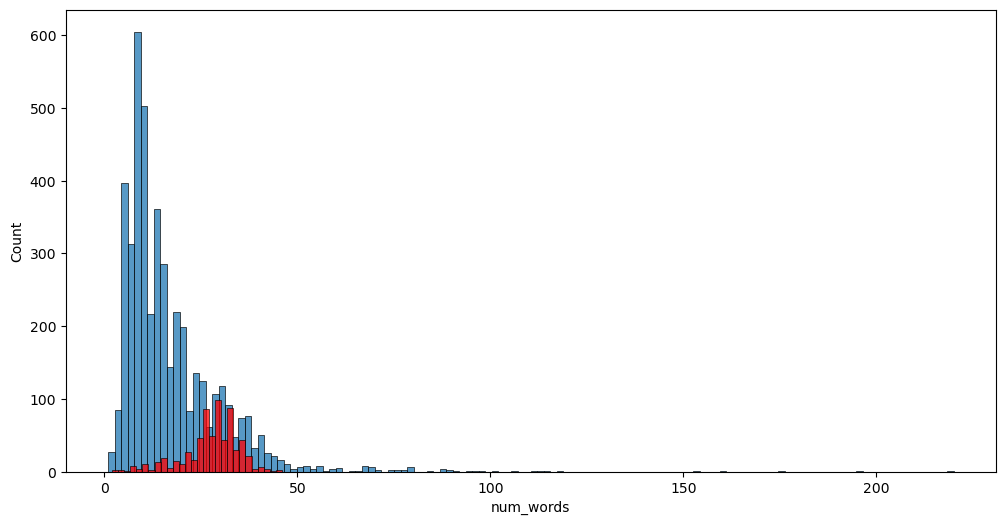

In [173]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

C:\Users\visma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\visma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\visma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


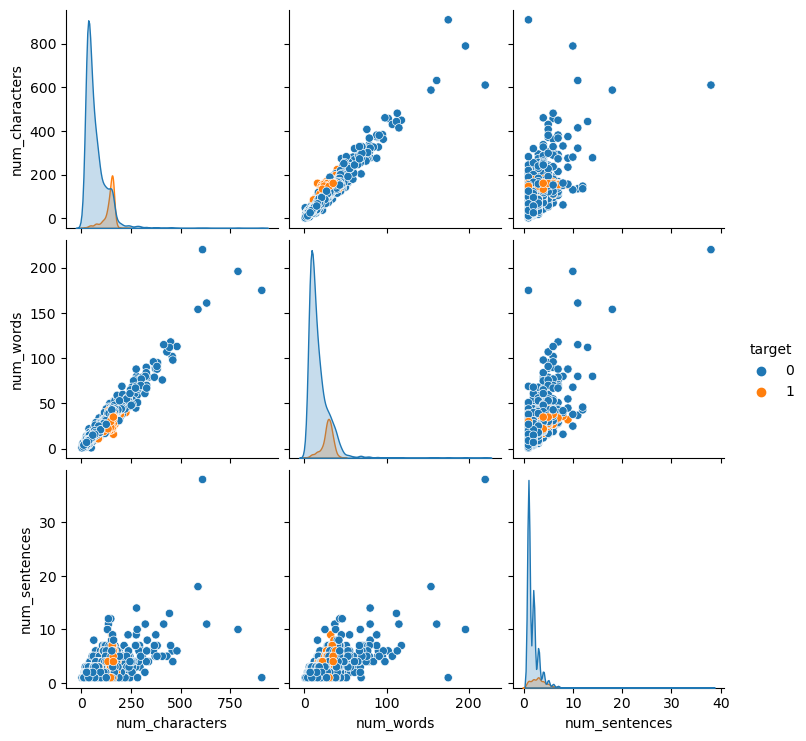

In [174]:
sns.pairplot(df,hue='target')

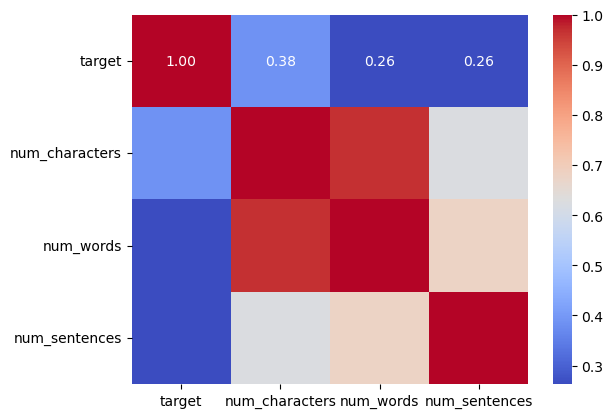

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [179]:
#data processing

In [209]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:] 
    y.clear()

    for i in text: 
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [214]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [213]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [215]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')


'love'

In [217]:
df['transformed_text'] = df['text'].apply(transform_text)

In [218]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [225]:
from wordcloud import WordCloud
wc = WordCloud (width=500, height=500,min_font_size=10, background_color='white')

In [226]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

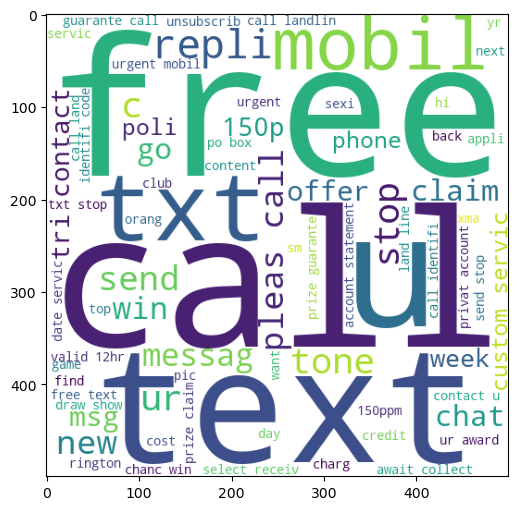

In [228]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [229]:
spam_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

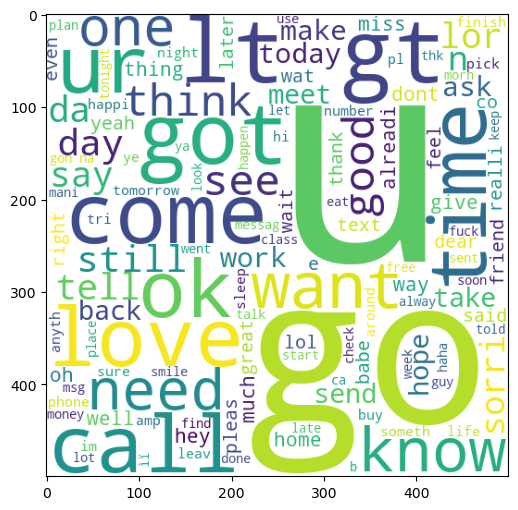

In [230]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [231]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [235]:
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    print(msg)

free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18
freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv
winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour
mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030
six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info
urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18
xxxmobilemovieclub use credit click wap link next txt messag click http
england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq
thank subscript rington uk mobil charg pleas confirm repli ye repli charg
07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow
sm ac sptv new jersey devil detroit red wi

In [236]:
spam_corpus = []
for msg in df [df['target'] == 1] ['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [237]:
len(spam_corpus)

9939

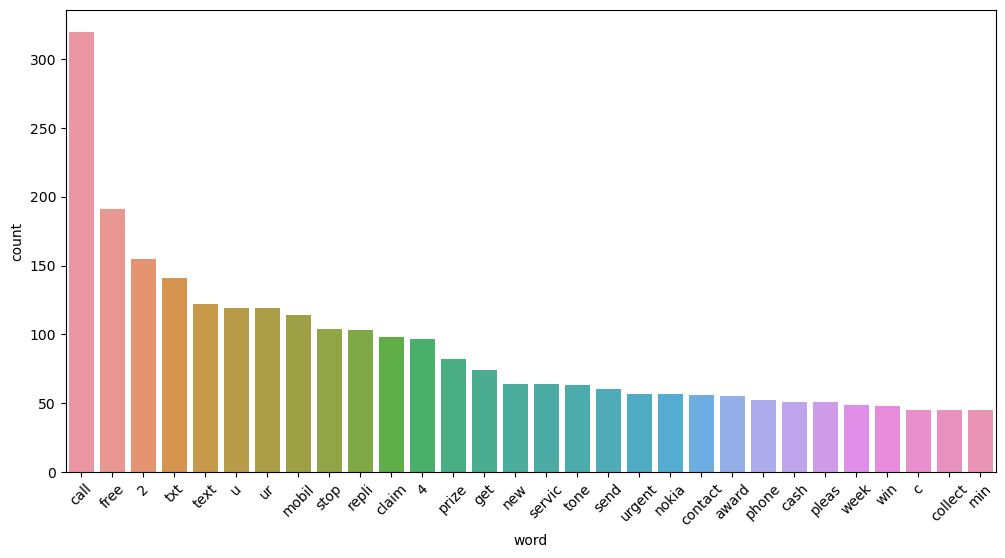

In [242]:
from collections import Counter 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming spam_corpus is a list of words or tokens
common_words = Counter(spam_corpus).most_common(30)

# Create a DataFrame from the most common words
common_words_df = pd.DataFrame(common_words, columns=['word', 'count'])

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='word', y='count', data=common_words_df)
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()    

In [245]:
ham_corpus = []
for msg in df [df['target'] == 0] ['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [246]:
len(ham_corpus)

35404

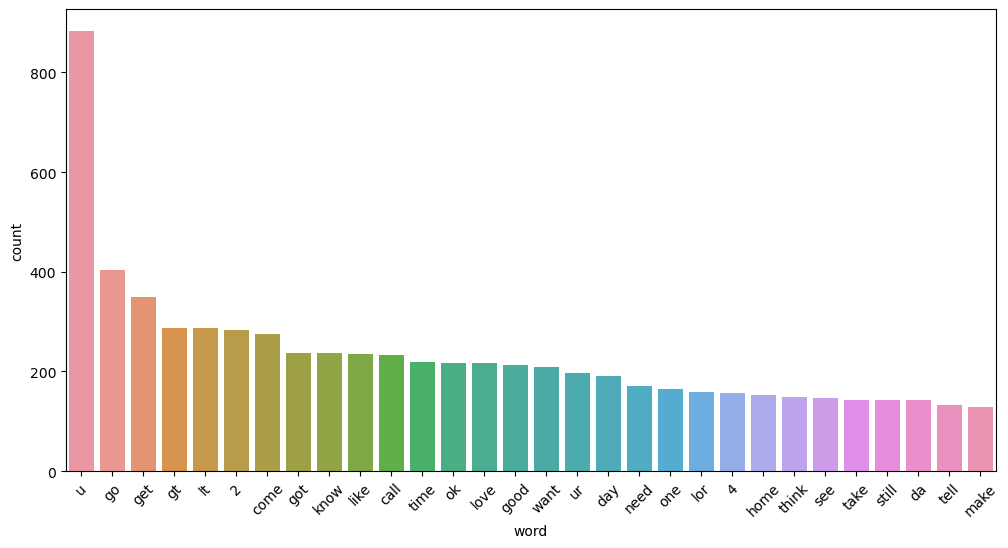

In [247]:
from collections import Counter 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming ham_corpus is a list of words or tokens
common_words = Counter(ham_corpus).most_common(30)

# Create a DataFrame from the most common words
common_words_df = pd.DataFrame(common_words, columns=['word', 'count'])

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='word', y='count', data=common_words_df)
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()    

In [248]:
#model Building

In [251]:
from sklearn.feature_extraction.text import CountVectorizer,TfidVectorizer
cv = CountVectorizer()   
tfidf = TfidVectorizer()

In [270]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [271]:
X.shape

(5169, 3000)

In [272]:
y = df['target'].values

In [273]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [274]:
from sklearn.model_selection import train_test_split

In [275]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [276]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [303]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [304]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [305]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [306]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [283]:
# tfidf --> MNB

In [285]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [300]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l2')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [307]:
clfs = {
    'SVC': svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'XGB': xgb
}

In [308]:
from sklearn.metrics import accuracy_score, precision_score

def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary') 
    return accuracy, precision

In [309]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [334]:
accuracy_scores = []
precision_scores = []

# Define the training function
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')  # Use 'binary' or 'weighted' as needed
    return accuracy, precision

# Loop through each classifier, train and evaluate it
for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    print(f"For {name}")
    print(f"Accuracy - {current_accuracy}")
    print(f"Precision - {current_precision}\n")
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

# Create a DataFrame to summarize the results
performance_df = pd.DataFrame({
    'Algorithm': list(clfs.keys()),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
})

print(performance_df)

For SVC
Accuracy - 0.9729206963249516
Precision - 0.9824561403508771

For KN
Accuracy - 0.9052224371373307
Precision - 1.0

For NB
Accuracy - 0.9709864603481625
Precision - 1.0

  Algorithm  Accuracy  Precision
0       SVC  0.972921   0.982456
1        KN  0.905222   1.000000
2        NB  0.970986   1.000000


In [335]:
performance_df = pd.DataFrame({
    'Algorithm': list(clfs.keys()),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
})

In [336]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.972921,0.982456
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000


In [337]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [338]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.972921
1,KN,Accuracy,0.905222
2,NB,Accuracy,0.970986
3,SVC,Precision,0.982456
4,KN,Precision,1.000000
5,NB,Precision,1.000000


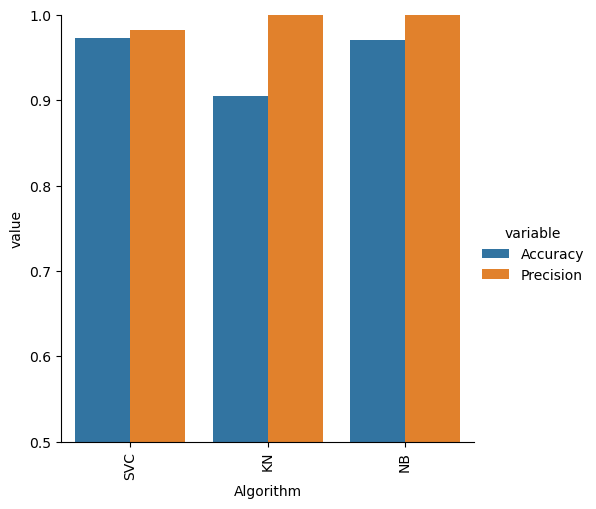

In [318]:
sns.catplot(x = 'Algorithm', y='value',
            hue = 'variable', data=performance_df1, kind='bar', height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [319]:
# model improvement

In [320]:
temp_df = pd.DataFrame({
    'Algorithm': list(clfs.keys()),
    'Accuracy_max_ft_3000': accuracy_scores,
    'Precision_max_ft_3000': precision_scores
})

In [321]:
performance_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,SVC,0.972921,0.982456,0.972921,0.982456
1,KN,0.905222,1.000000,0.905222,1.000000
2,NB,0.970986,1.000000,0.970986,1.000000


In [340]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [341]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [343]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [380]:
X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [381]:
X.shape

(5169, 3001)

In [382]:
y = df['target'].values

In [383]:
from sklearn.model_selection import train_test_split

In [384]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [385]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [386]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [387]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8907156673114119
[[807  89]
 [ 24 114]]
0.5615763546798029


In [388]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9410058027079303
[[896   0]
 [ 61  77]]
1.0


In [389]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [390]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [391]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l2')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [392]:
clfs = {
    'SVC': svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'XGB': xgb
}

In [393]:
from sklearn.metrics import accuracy_score, precision_score

def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary') 
    return accuracy, precision

In [394]:
train_classifier(svc,X_train,y_train,X_test,y_test)

C:\Users\visma\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.8665377176015474, 0.0)

In [395]:
accuracy_scores = []
precision_scores = []

# Define the training function
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')  # Use 'binary' or 'weighted' as needed
    return accuracy, precision

# Loop through each classifier, train and evaluate it
for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    print(f"For {name}")
    print(f"Accuracy - {current_accuracy}")
    print(f"Precision - {current_precision}\n")
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

# Create a DataFrame to summarize the results
performance_df = pd.DataFrame({
    'Algorithm': list(clfs.keys()),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
})

print(performance_df)

C:\Users\visma\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For SVC
Accuracy - 0.8665377176015474
Precision - 0.0

For KN
Accuracy - 0.9342359767891683
Precision - 0.8240740740740741

For NB
Accuracy - 0.9410058027079303
Precision - 1.0

For DT
Accuracy - 0.9439071566731141
Precision - 0.8773584905660378

For LR
Accuracy - 0.9671179883945842
Precision - 0.9905660377358491

For RF
Accuracy - 0.9690522243713733
Precision - 0.9818181818181818

For AdaBoost
Accuracy - 0.9642166344294004
Precision - 0.9316239316239316

For BgC
Accuracy - 0.9661508704061895
Precision - 0.8992248062015504

For ETC
Accuracy - 0.9787234042553191
Precision - 0.9754098360655737

For GBDT
Accuracy - 0.9516441005802708
Precision - 0.9313725490196079

For XGB
Accuracy - 0.9690522243713733
Precision - 0.9416666666666667

   Algorithm  Accuracy  Precision
0        SVC  0.866538   0.000000
1         KN  0.934236   0.824074
2         NB  0.941006   1.000000
3         DT  0.943907   0.877358
4         LR  0.967118   0.990566
5         RF  0.969052   0.981818
6   AdaBoost  0.96421

In [396]:
performance_df = pd.DataFrame({
    'Algorithm': list(clfs.keys()),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
})

In [397]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.866538,0.000000
1,KN,0.934236,0.824074
2,NB,0.941006,1.000000
3,DT,0.943907,0.877358
4,LR,0.967118,0.990566
5,RF,0.969052,0.981818
6,AdaBoost,0.964217,0.931624
7,BgC,0.966151,0.899225
8,ETC,0.978723,0.975410
9,GBDT,0.951644,0.931373


In [398]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [399]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.866538
1,KN,Accuracy,0.934236
2,NB,Accuracy,0.941006
3,DT,Accuracy,0.943907
4,LR,Accuracy,0.967118
5,RF,Accuracy,0.969052
6,AdaBoost,Accuracy,0.964217
7,BgC,Accuracy,0.966151
8,ETC,Accuracy,0.978723
9,GBDT,Accuracy,0.951644


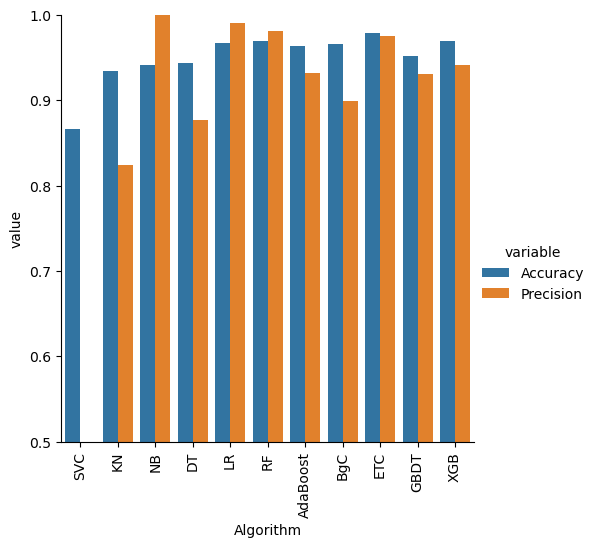

In [400]:
sns.catplot(x = 'Algorithm', y='value',
            hue = 'variable', data=performance_df1, kind='bar', height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [401]:
temp_df = pd.DataFrame({
    'Algorithm': list(clfs.keys()),
    'Accuracy_max_ft_3000': accuracy_scores,
    'Precision_max_ft_3000': precision_scores
})

In [402]:
# Assuming performance_df and temp_df are already defined and have a common column 'Algorithm'

new_df = performance_df.merge(temp_df, on='Algorithm')

In [403]:
new_df_scaled = new_df.merge(temp_df, on='Algorithm')

In [404]:
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000_x,Precision_max_ft_3000_x,Accuracy_max_ft_3000_y,Precision_max_ft_3000_y
0,SVC,0.866538,0.000000,0.866538,0.000000,0.866538,0.000000
1,KN,0.934236,0.824074,0.934236,0.824074,0.934236,0.824074
2,NB,0.941006,1.000000,0.941006,1.000000,0.941006,1.000000
3,DT,0.943907,0.877358,0.943907,0.877358,0.943907,0.877358
4,LR,0.967118,0.990566,0.967118,0.990566,0.967118,0.990566
5,RF,0.969052,0.981818,0.969052,0.981818,0.969052,0.981818
6,AdaBoost,0.964217,0.931624,0.964217,0.931624,0.964217,0.931624
7,BgC,0.966151,0.899225,0.966151,0.899225,0.966151,0.899225
8,ETC,0.978723,0.975410,0.978723,0.975410,0.978723,0.975410
9,GBDT,0.951644,0.931373,0.951644,0.931373,0.951644,0.931373


In [407]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier
# Define classifiers
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [408]:
# Create a VotingClassifier
voting_clf = VotingClassifier(
    estimators=[('svc', svc), ('mnb', mnb), ('etc', etc)],
    voting='soft'  # 'soft' uses predicted probabilities, 'hard' uses predicted class labels
)

In [409]:
# Fit the VotingClassifier
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('svc',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('mnb', MultinomialNB()),
                             ('etc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [410]:
# Predict using the VotingClassifier
y_pred = voting_clf.predict(X_test)
# Evaluate the VotingClassifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

In [411]:
print("Accuracy:", accuracy)
print("Precision:", precision)

Accuracy: 0.941972920696325
Precision: 1.0


In [413]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [414]:
from sklearn.ensemble import StackingClassifier

In [416]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [417]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy", accuracy_score(y_test,y_pred))
print("Precision", precision_score(y_test,y_pred))

Accuracy 0.9748549323017408
Precision 0.9242424242424242


In [420]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))